In [1]:
import wandb
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from keras.datasets import fashion_mnist

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = 16,12
plt.rcParams['font.serif'] = "Cambria"
plt.rcParams['font.family'] = "serif"

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
# Loading the pre-shuffled fashion mnist dataset
(X_fashion_train, y_fashion_train), (X_fashion_test, y_fashion_test) = fashion_mnist.load_data()

# Splitting the training and validation dataset
X_train = (X_fashion_train.reshape(60000, 784)[:10000, :] > 127).astype(float)
y_train = y_fashion_train[:10000]
X_val = (X_fashion_train.reshape(60000, 784)[10000 : 12500, :] > 127).astype(float)
y_val = y_fashion_train[10000 : 12500]

# Getting the test data
X_test = (X_fashion_test.reshape(10000, 784)[:2500, :] > 127).astype(float)
y_test = y_fashion_test[:2500]

# Checking the shapes
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(10000, 784) (10000,) (2500, 784) (2500,) (2500, 784) (2500,)


In [3]:
model = pickle.load(open("Q4_best_model.pickle", "rb"))

# Get the parameters for last epoch
epoch = -1
W = model.param_hist["W"][epoch]
b = model.param_hist["b"][epoch]
c = model.param_hist["c"][epoch]

X_train_hidden = model.sample_h(W, c, X_train.T).T
X_val_hidden = model.sample_h(W, c, X_val.T).T
X_test_hidden = model.sample_h(W, c, X_test.T).T

wandb: Currently logged in as: cs6910-team (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.30 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


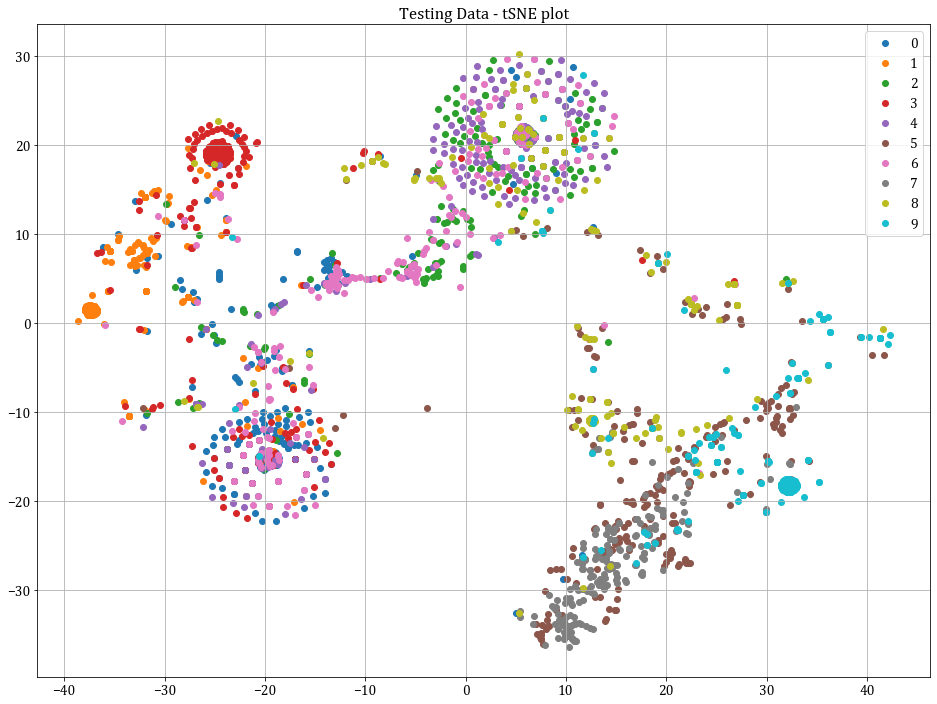

/home/sowmya/.local/lib/python3.8/site-packages/plotly/matplotlylib/mplexporter/exporter.py:267: MatplotlibDeprecationWarning:


The get_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.

/home/sowmya/.local/lib/python3.8/site-packages/plotly/matplotlylib/renderer.py:473: UserWarning:

Dang! That path collection is out of this world. I totally don't know what to do with it yet! Plotly can only import path collections linked to 'data' coordinates

/home/sowmya/.local/lib/python3.8/site-packages/plotly/matplotlylib/renderer.py:511: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



In [4]:
wandb.init(project='assignment-4', entity='cs6910-team')
config = wandb.config

# Get the embedded form
tsne = TSNE(n_components=2)
X_embedded = tsne.fit_transform(X_test_hidden)

# Plot the tSNE plot
fig = plt.figure()
plt.title("Testing Data - tSNE plot")

num_classes = np.unique(y_test).size
for cat in range(num_classes):
    mask = (y_test==cat)
    X_select = X_embedded[mask, :]
    plt.scatter(X_select[:,0], X_select[:,1], label=cat)

plt.legend()
plt.show()
wandb.log({"chart": fig})